In [1]:
import torch 
import utils
import numpy as np

import model_utls
import models
from pathlib import Path
import json

import torchaudio
import data
import matplotlib.pyplot as plt

In [2]:
# tag = '4s_CuestaInTrained_Fix_HCQT_Torch'

tag = "4s_CuestaInTrained_Fix_to_Trainable_HCQT_Torch_bc1song_again_testL2loss_with_regularization_v3"

# tag = 'unsupervised_4s_satb_bc1song_mf0_1_pierre'

# tag = '4s_CuestaInTrained_Fix_to_Trainable_HCQT_Torch_bc1song'
# tag = '4s_CuestaInTrained_Trainable_HCQT_Torch_bc1song'

# tag = '4s_CuestaInTrained_Trainable_HCQT_bc1song_testL2loss2'

# tag = '4s_CuestaInTrained_Fix_HCQT_Torch_bc1song_again'

In [3]:
# Load model arguments
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_path = 'trained_models/{}'.format(tag)
# load model from disk
with open(Path(model_path, tag + '.json'), 'r') as stream:
    results = json.load(stream)

target_model_path = next(Path(model_path).glob("%s*.pth" % tag))
state = torch.load(
    target_model_path,
    map_location=device
)

architecture = results['args']['architecture']
model_class = model_utls.ModelLoader.get_model(architecture)
trained_model = model_class.from_config(results['args'])

if 'cuesta_model' in results['args']:
    if results['args']['cuesta_model']:
        trained_model.F0Extractor = models.F0Extractor(trained_cuesta=False)
        
trained_model.load_state_dict(state)
trained_model = trained_model.eval()
trained_model = trained_model.to(device)

In [4]:
# print(trained_model.F0Extractor.cuesta[-2].weight)
# print(trained_model.F0Extractor.cuesta[-2].bias)
# print(trained_model.F0Extractor.cuesta[-2].running_mean)
# print(trained_model.F0Extractor.cuesta[-2].running_var)

In [5]:
# weights = np.load('./cuesta_weight/cuesta.npy', allow_pickle=True)
# print(weights[-1][0])

In [6]:
# define the resampler to 22050 Hz
resampler = torchaudio.transforms.Resample(44100, 16000)
resampler = resampler.to(device)

# load audio file and resample it to 22050 Hz
audio, sr = torchaudio.load('/home/ids/chouteau/umss/Datasets/BC/mixtures_4_sources/1_BC001_part1_satb.wav')
audio = resampler(audio)
audio = audio.to(device)


predicted_output = trained_model.F0Extractor.eval()(audio)

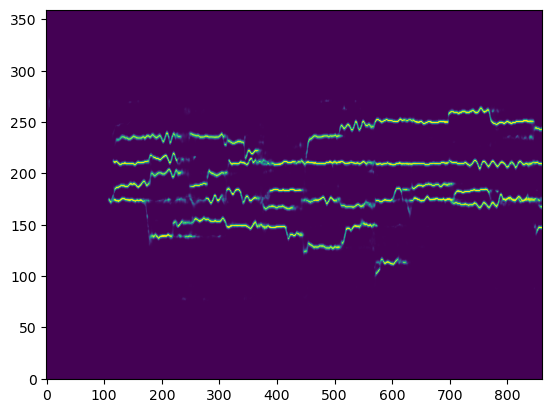

In [7]:
plt.imshow(predicted_output[0, :, :].detach().cpu().numpy(), aspect='auto', origin='lower')
plt.show()

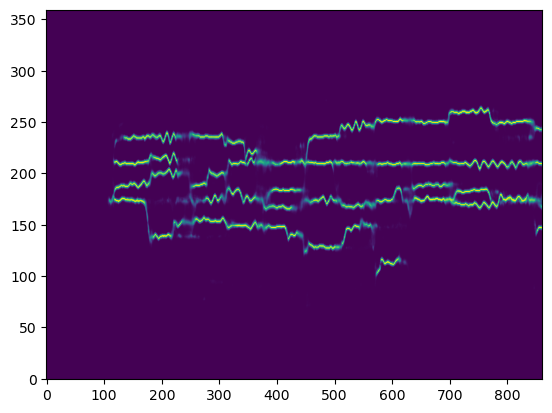

In [8]:
tag = '4s_CuestaInTrained_Fix_HCQT_Torch'


# Load model arguments
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_path = 'trained_models/{}'.format(tag)
# load model from disk
with open(Path(model_path, tag + '.json'), 'r') as stream:
    results = json.load(stream)

target_model_path = next(Path(model_path).glob("%s*.pth" % tag))
state = torch.load(
    target_model_path,
    map_location=device
)

architecture = results['args']['architecture']
model_class = model_utls.ModelLoader.get_model(architecture)
trained_model = model_class.from_config(results['args'])

if 'cuesta_model' in results['args']:
    if results['args']['cuesta_model']:
        trained_model.F0Extractor = models.F0Extractor(trained_cuesta=False)
        
trained_model.load_state_dict(state)
trained_model = trained_model.eval()
trained_model = trained_model.to(device)


# define the resampler to 22050 Hz
resampler = torchaudio.transforms.Resample(44100, 16000)
resampler = resampler.to(device)

# load audio file and resample it to 22050 Hz
audio, sr = torchaudio.load('/home/ids/chouteau/umss/Datasets/BC/mixtures_4_sources/1_BC001_part1_satb.wav')
audio = resampler(audio)
audio = audio.to(device)


predicted_output = trained_model.F0Extractor.eval()(audio)


plt.imshow(predicted_output[0, :, :].detach().cpu().numpy(), aspect='auto', origin='lower')
plt.show()